In [1]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

In [2]:
import numpy as np
import scipy.stats as stats
from scipy import interpolate
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd

from bgspy.genome import Genome
from bgspy.data import GenomeData, get_accessible_from_seqs

In [3]:
plt.rcParams['figure.figsize'] = [8, 4]
plt.rcParams['figure.dpi'] = 200

In [4]:
g = Genome('hg38', seqlens_file="../data/annotation/hg38_seqlens.tsv", chroms=['chr1'])
g.load_annot("../data/annotation/conserved_phastcons_thresh0.bed.gz")
g.load_recmap("../data/annotation/hapmap_genetic_map.txt")

load_bed_annotation(): ignored chr14, chr7, chr10, chr12, chr9, chr11, chr17, chr2, chr6, chr15, chr13, chr4, chr20, chrX, chr16, chr21, chr19, chr5, chr8, chr22, chrY, chr3, chr18
ignoring HapMap header...
parsing recmap as HapMap formatted (chrom, end, rate)
RecMap._readmap() ignored chr14, chr7, chr10, chr12, chr9, chr11, chr17, chr2, chr6, chr15, chr13, chr4, chr20, chrX, chr16, chr21, chr19, chr5, chr8, chr22, chr3, chr18


In [24]:
gd = GenomeData(g)
gd.load_counts_dir('../data/hg1k_counts/')
gd.load_neutral_masks('../data/annotation/neutral_phastcons_transcript_with_introns.bed.gz')
gd.load_accessibile_masks('../data/annotation/no_centro.bed')

In [25]:
gd.stats()

{'chr1': (0.7043226022906129, 0.9783094569056748)}

In [26]:
gd.load_fasta('../data/annotation/hg38.fa.gz')

In [27]:
gd.stats()

{'chr1': (0.7043226022906129, 0.4447473502009119)}

In [28]:
bins, pi = gd.bin_pi(width=1e6, filter_neutral=True, filter_accessible=True)
bins_alt, pi_alt = gd.bin_pi(width=1e6, filter_neutral=False, filter_accessible=False)

In [29]:
dalt = pd.read_csv('../data/all_pidxy_win-size_1000000_merged-mask_True_state_all_curr_all.tsv', sep='\t')
dalt['midpoint'] = (dalt.start + dalt.end)/2
dalt_pi = dalt.loc[(dalt.stat == 'pi') & (dalt.spp1 == 'homo')]

In [30]:
dalt_pi.head()

,value,stat,spp1,spp2,chr,start,end,n_acc_bases,n_snps,midpoint
13392,NaN,pi,homo,homo,chr1,1,1000000,0,0,500000.5
13393,0.000887,pi,homo,homo,chr1,1000001,2000000,283857,1109,1500000.5
13394,0.001038,pi,homo,homo,chr1,2000001,3000000,455783,1995,2500000.5
13395,0.001348,pi,homo,homo,chr1,3000001,4000000,570312,3066,3500000.5
13396,0.001300,pi,homo,homo,chr1,4000001,5000000,794579,4005,4500000.5


In [31]:
md = pd.read_csv('../data/murphy_digitized.csv', names=('pos', 'pi'))

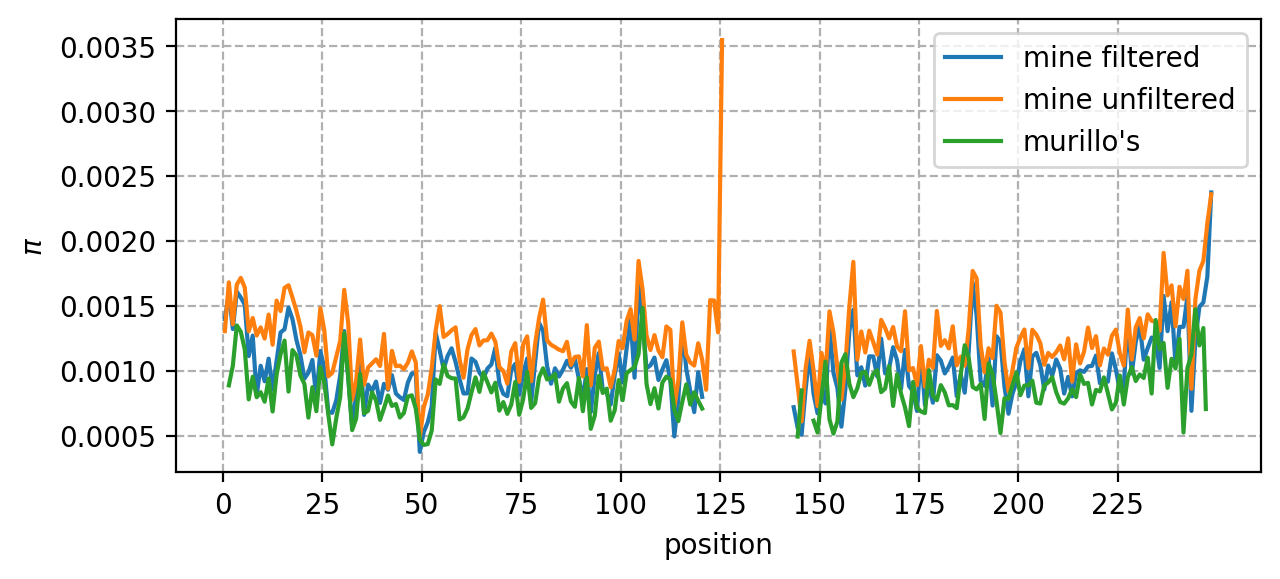

In [32]:
fig, ax = plt.subplots(figsize=(7, 3))

x, y = pi['chr1'].pairs
ax.plot(x/1e6, y, label='mine filtered')

x, y = pi_alt['chr1'].pairs
ax.plot(x/1e6, y, label='mine unfiltered')

dalt_pi_chr1 = dalt_pi.loc[dalt_pi.chr == 'chr1']
ax.plot(dalt_pi_chr1.midpoint/1e6, dalt_pi_chr1.value, label="murillo's")
grid = np.arange(0, 250, 25)
ax.set_xticks(grid)
ax.set_xlabel('position')
ax.set_ylabel('$\pi$')
ax.legend()
ax.grid(linestyle='dashed')

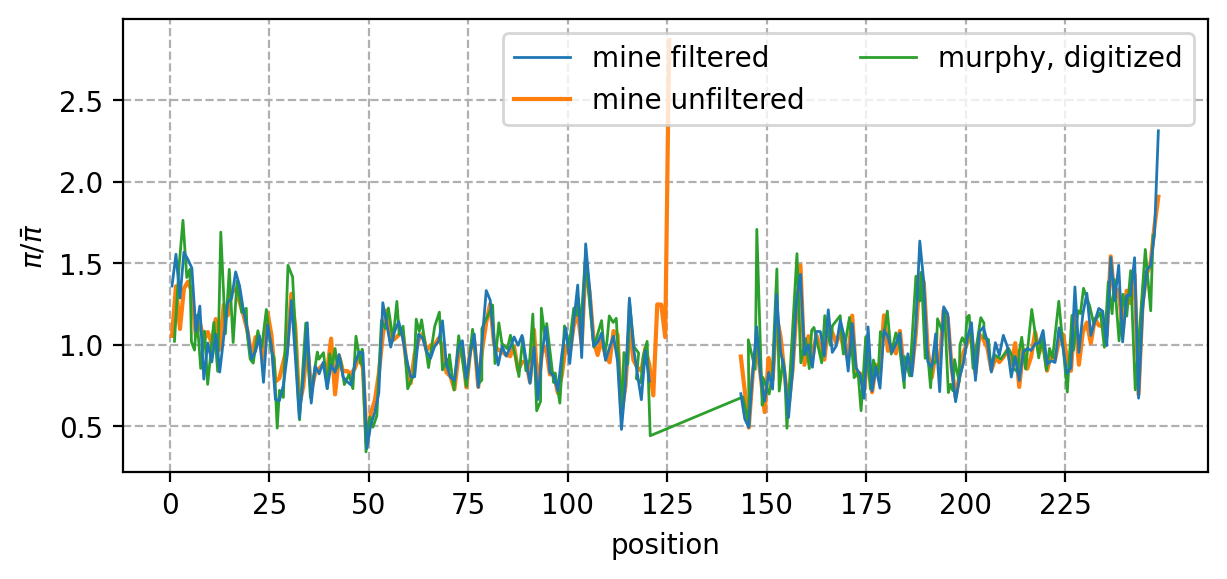

In [33]:

def ratio(x):
    return x/np.nanmean(x)

fig, ax = plt.subplots(figsize=(7, 3))

x, y = pi['chr1'].pairs
ax.plot(x/1e6, ratio(y), label='mine filtered', zorder=3, linewidth=1)
#ax.scatter(x/1e6, ratio(y), c=pi['chr1'].n[1:] < 5e3, zorder=3, linewidth=1)

x, y = pi_alt['chr1'].pairs
ax.plot(x/1e6, ratio(y), label='mine unfiltered')

ax.plot(md['pos'], ratio(md['pi']), label='murphy, digitized', linewidth=1)

dalt_pi_chr1 = dalt_pi.loc[dalt_pi.chr == 'chr1']
#ax.plot(dalt_pi_chr1.midpoint/1e6, center(dalt_pi_chr1.value), label="murillo's")
grid = np.arange(0, 250, 25)
ax.set_xticks(grid)
ax.set_xlabel('position')
ax.set_ylabel('$\pi/\\bar{\pi}$')
ax.legend(ncol=2)
ax.grid(linestyle='dashed')

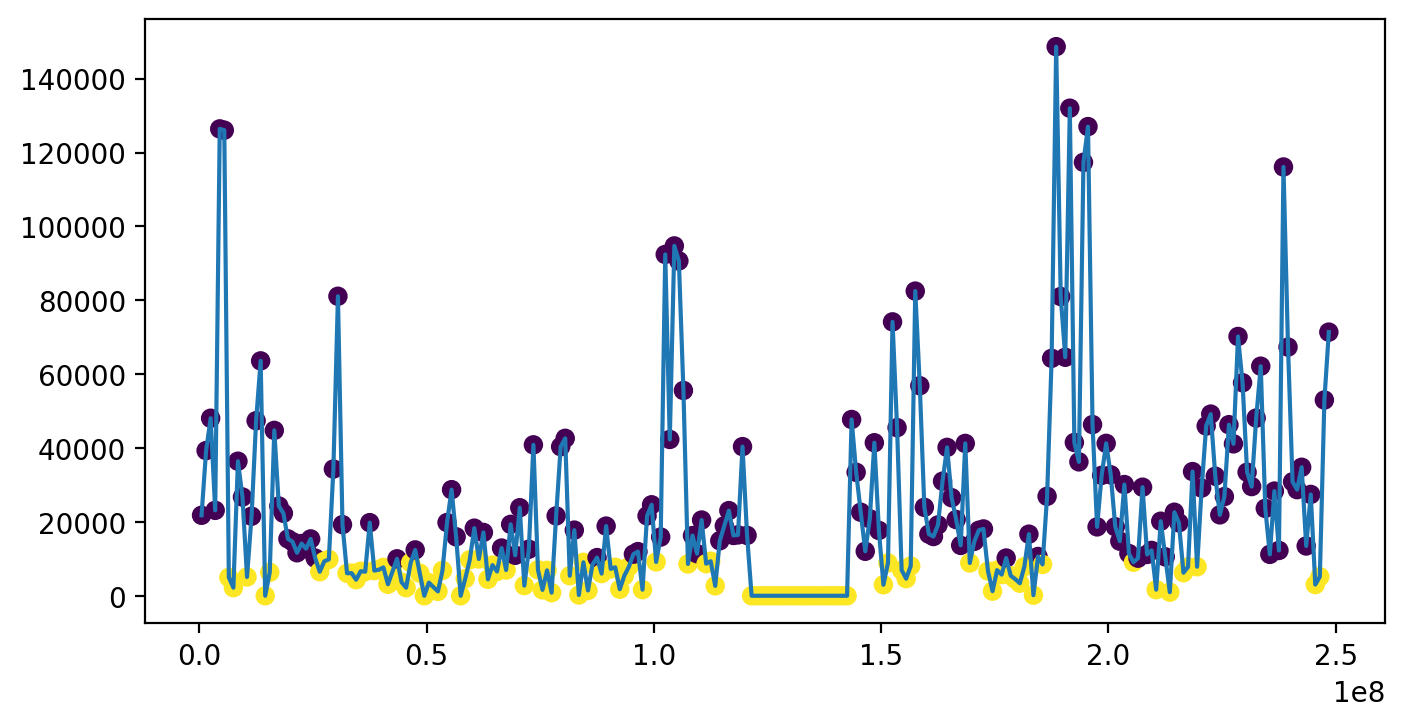

In [15]:
plt.plot(pi['chr1'].midpoints, pi['chr1'].n[1:])
plt.scatter(pi['chr1'].midpoints, pi['chr1'].n[1:], c=pi['chr1'].n[1:]<10e3)

In [16]:
bins_100kb, pi_100kb = gd.bin_pi(width=5e5, filter_neutral=True, filter_accessible=True)

(0.0, 3.0)

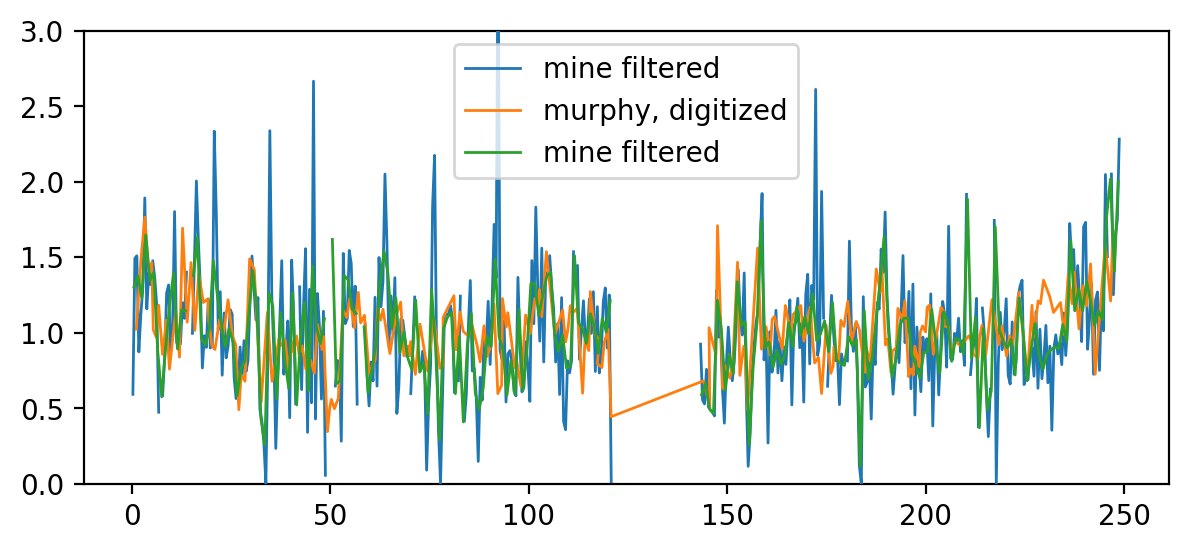

In [17]:
fig, ax = plt.subplots(figsize=(7, 3))

x, y = pi_100kb['chr1'].pairs
ax.plot(x/1e6, ratio(y), label='mine filtered', zorder=3, linewidth=1)
ax.plot(md['pos'], ratio(md['pi']), label='murphy, digitized', linewidth=1, zorder=3)
x, y = pi['chr1'].pairs
ax.plot(x/1e6, ratio(y), label='mine filtered', zorder=3, linewidth=1)

ax.legend()
ax.set_ylim(0, 3)


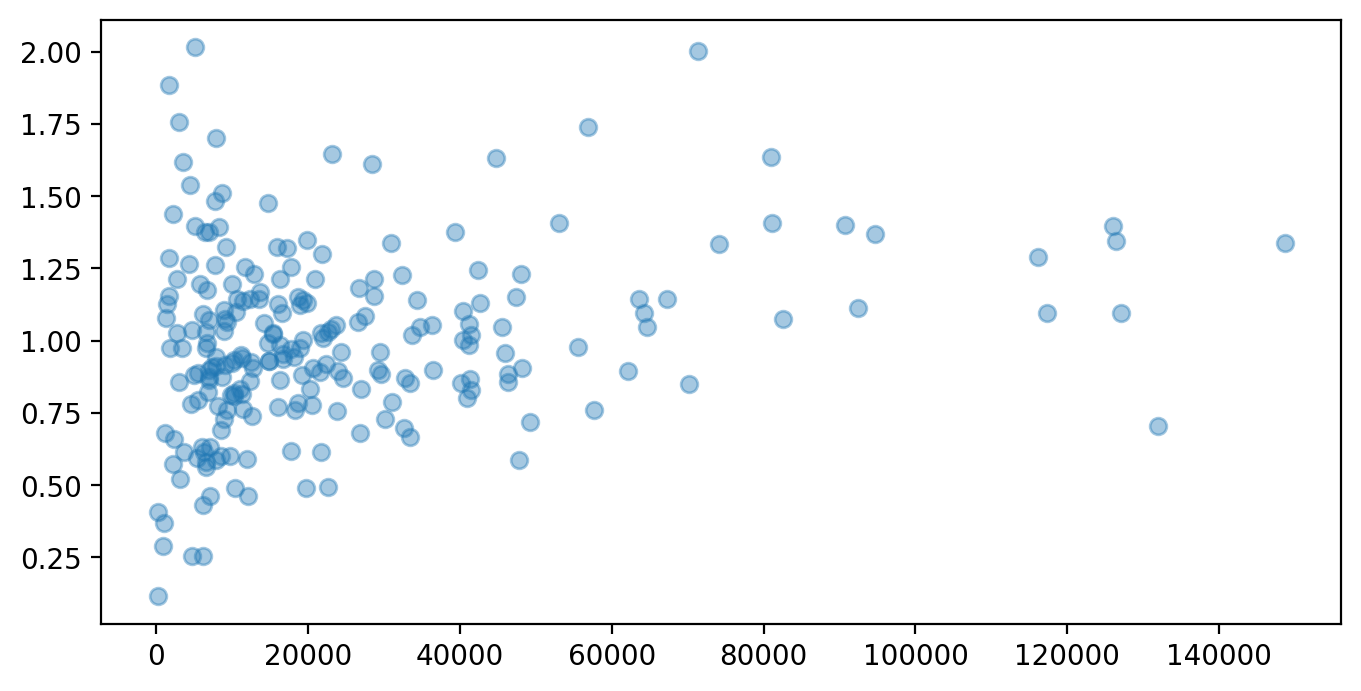

In [18]:
x, y = pi['chr1'].pairs
plt.scatter(pi['chr1'].n[1:], ratio(y), alpha=0.4)


In [19]:
pi_100kb['chr1'].n.shape, y.shape

((499,), (249,))